In [ ]:
########################################### DECISION TREE ALGORITHM ##########################################################

In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setting graph visual
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [3]:
car_df = pd.read_csv('car_evaluation.csv', header = None)
car_df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [4]:
#Provide column names
car_df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#General information about the data set
car_df.info()
#Seems like the data set does not have any null or missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [6]:
#Describtion of the dataset
car_df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,3,more,small,med,unacc
freq,432,432,432,576,576,576,1210


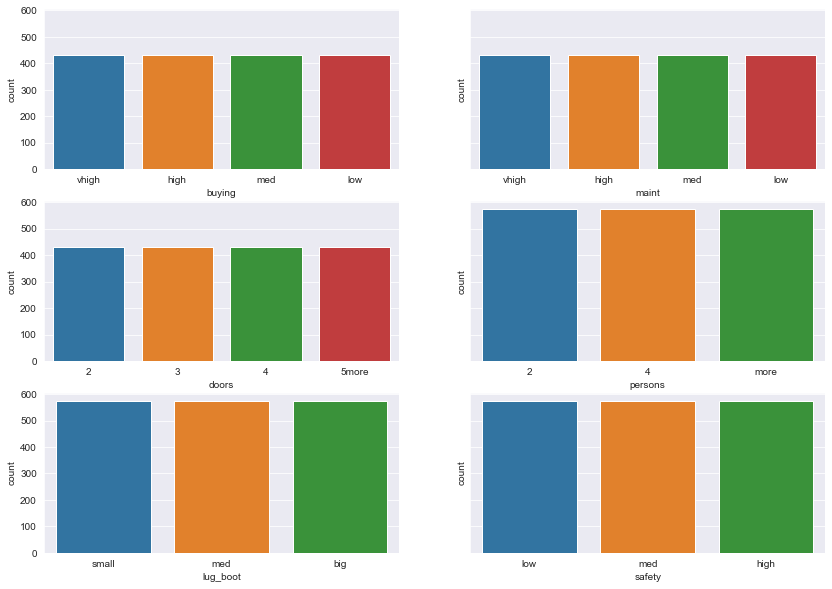

In [23]:
#Using some countplots to examine the data
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))
sns.countplot(x=car_df['buying'], ax=axes[0][0])
sns.countplot(x=car_df['maint'], ax=axes[0][1])
sns.countplot(x=car_df['doors'], ax=axes[1][0])
sns.countplot(x=car_df['persons'], ax=axes[1][1])
sns.countplot(x=car_df['lug_boot'], ax=axes[2][0])
sns.countplot(x=car_df['safety'], ax=axes[2][1])
plt.show()

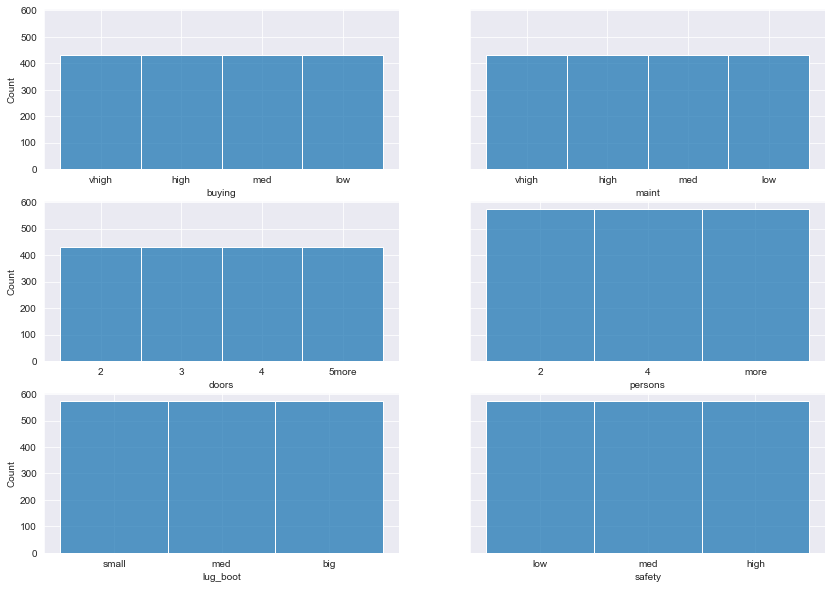

In [24]:
#Taking a look at the distribtion in terms of histogram plot
fig, axes = plt.subplots(nrows=3, ncols=2, sharey=True, figsize=(14, 10))
sns.histplot(x=car_df['buying'], ax=axes[0][0])
sns.histplot(x=car_df['maint'], ax=axes[0][1])
sns.histplot(x=car_df['doors'], ax=axes[1][0])
sns.histplot(x=car_df['persons'], ax=axes[1][1])
sns.histplot(x=car_df['lug_boot'], ax=axes[2][0])
sns.histplot(x=car_df['safety'], ax=axes[2][1])
plt.show()

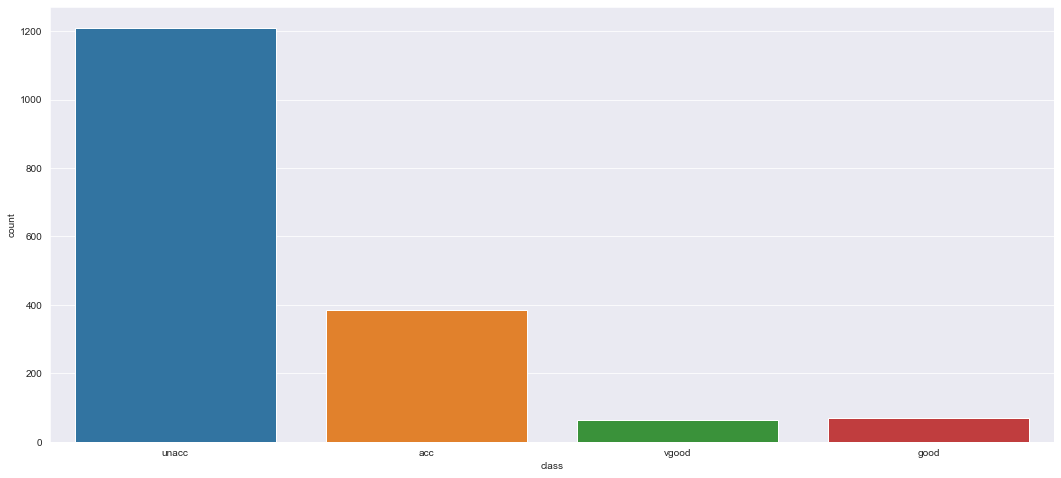

In [26]:
#Target value
sns.countplot(x = car_df['class'])
plt.show()

In [27]:
car_df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [ ]:
################################################### DATA PROCESSING ########################################################

In [ ]:
#Since all of our data are ordinal categorical variables (can be order in terms of rank such as small, med, large, etc)
# We now need to encode them into numbers for training while still maintaining their order
# We can do this by using sklearn's ordinal encorder or manually mapping it
# P.S: We can't use hot encoding/get_dummies here because it will not ensure the order

In [29]:
#The first method is to do manual encoding
buying_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
maint_mappings = {'low':0, 'med':1, 'high':2, 'vhigh':3}
door_mappings = {'2':2, '3':3, '4':4, '5more':5}
persons_mappings = {'2':2, '4':4, 'more':5}
lug_boot_mappings = {'small':0, 'med':1, 'big':2}
safety_mappings = {'low':0, 'med':1, 'high':2}
class_mappings = {'unacc':0, 'acc':1, 'good':2, 'vgood':3}

dict_mapping = {'buying' : buying_mappings, 'maint' : maint_mappings, 'doors' : door_mappings, 'persons' : persons_mappings,
               'lug_boot' : lug_boot_mappings, 'safety' : safety_mappings, 'class' : class_mappings}

#After which, we use pandas function .map
# .map(dictionary) to apply our mappings to the right column
for column in car_df:
    car_df[column] = car_df[column].map(dict_mapping[column])

In [30]:
#Check our dataframe after mapping
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0


In [ ]:
########################################### BUILDING THE TREE MODEL #########################################################

In [31]:
#Split train and test data
from sklearn.model_selection import train_test_split
X = car_df[car_df.columns.drop(labels = ['class'])]
y = car_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [32]:
#Now we use the DecisionTreeClassifier model and begin training using the fit method
from sklearn.tree import DecisionTreeClassifier
car_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
car_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [34]:
from sklearn.metrics import accuracy_score
#Evaluate the gini model
result_gini = car_gini.predict(X_test)

print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, result_gini)))

Model accuracy score with criterion gini index: 0.7962


In [36]:
#Compare train_set and test_set accuracy to check for overfitting
result_train_gini = car_gini.predict(X_train)

print('Training set score: {:.4f}'.format(car_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(car_gini.score(X_test, y_test)))

Training set score: 0.7909
Test set score: 0.7962


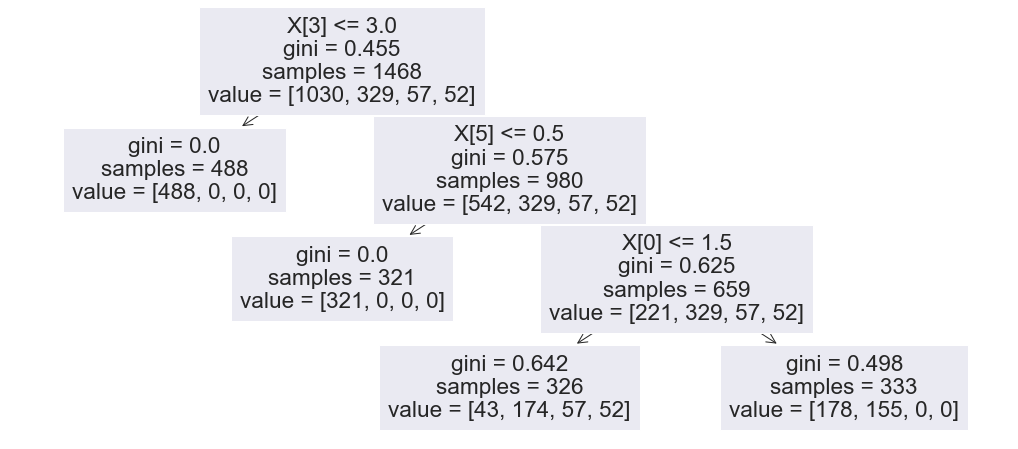

In [37]:
#Visualizing the decision tree
from sklearn import tree
tree.plot_tree(car_gini)
plt.show()


In [39]:
#Testing with Random Forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

rfc_result = rfc.predict(X_test)
print('Model accuracy score: ' + str(accuracy_score(y_test, rfc_result)))

Model accuracy score: 0.9769230769230769


In [40]:
#Tetsting Decision Tree Classifier with criterion = entropy
car_entropy = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 129) #max_depth = 3 cause there are a total of 4 unique result
car_entropy.fit(X_train, y_train)

entropy_result = car_entropy.predict(X_test)
print('Model accuracy score with criterion entropy: ' + str(accuracy_score(y_test, entropy_result)))
#Seems like getting the same result with gini

Model accuracy score with criterion entropy: 0.7961538461538461
